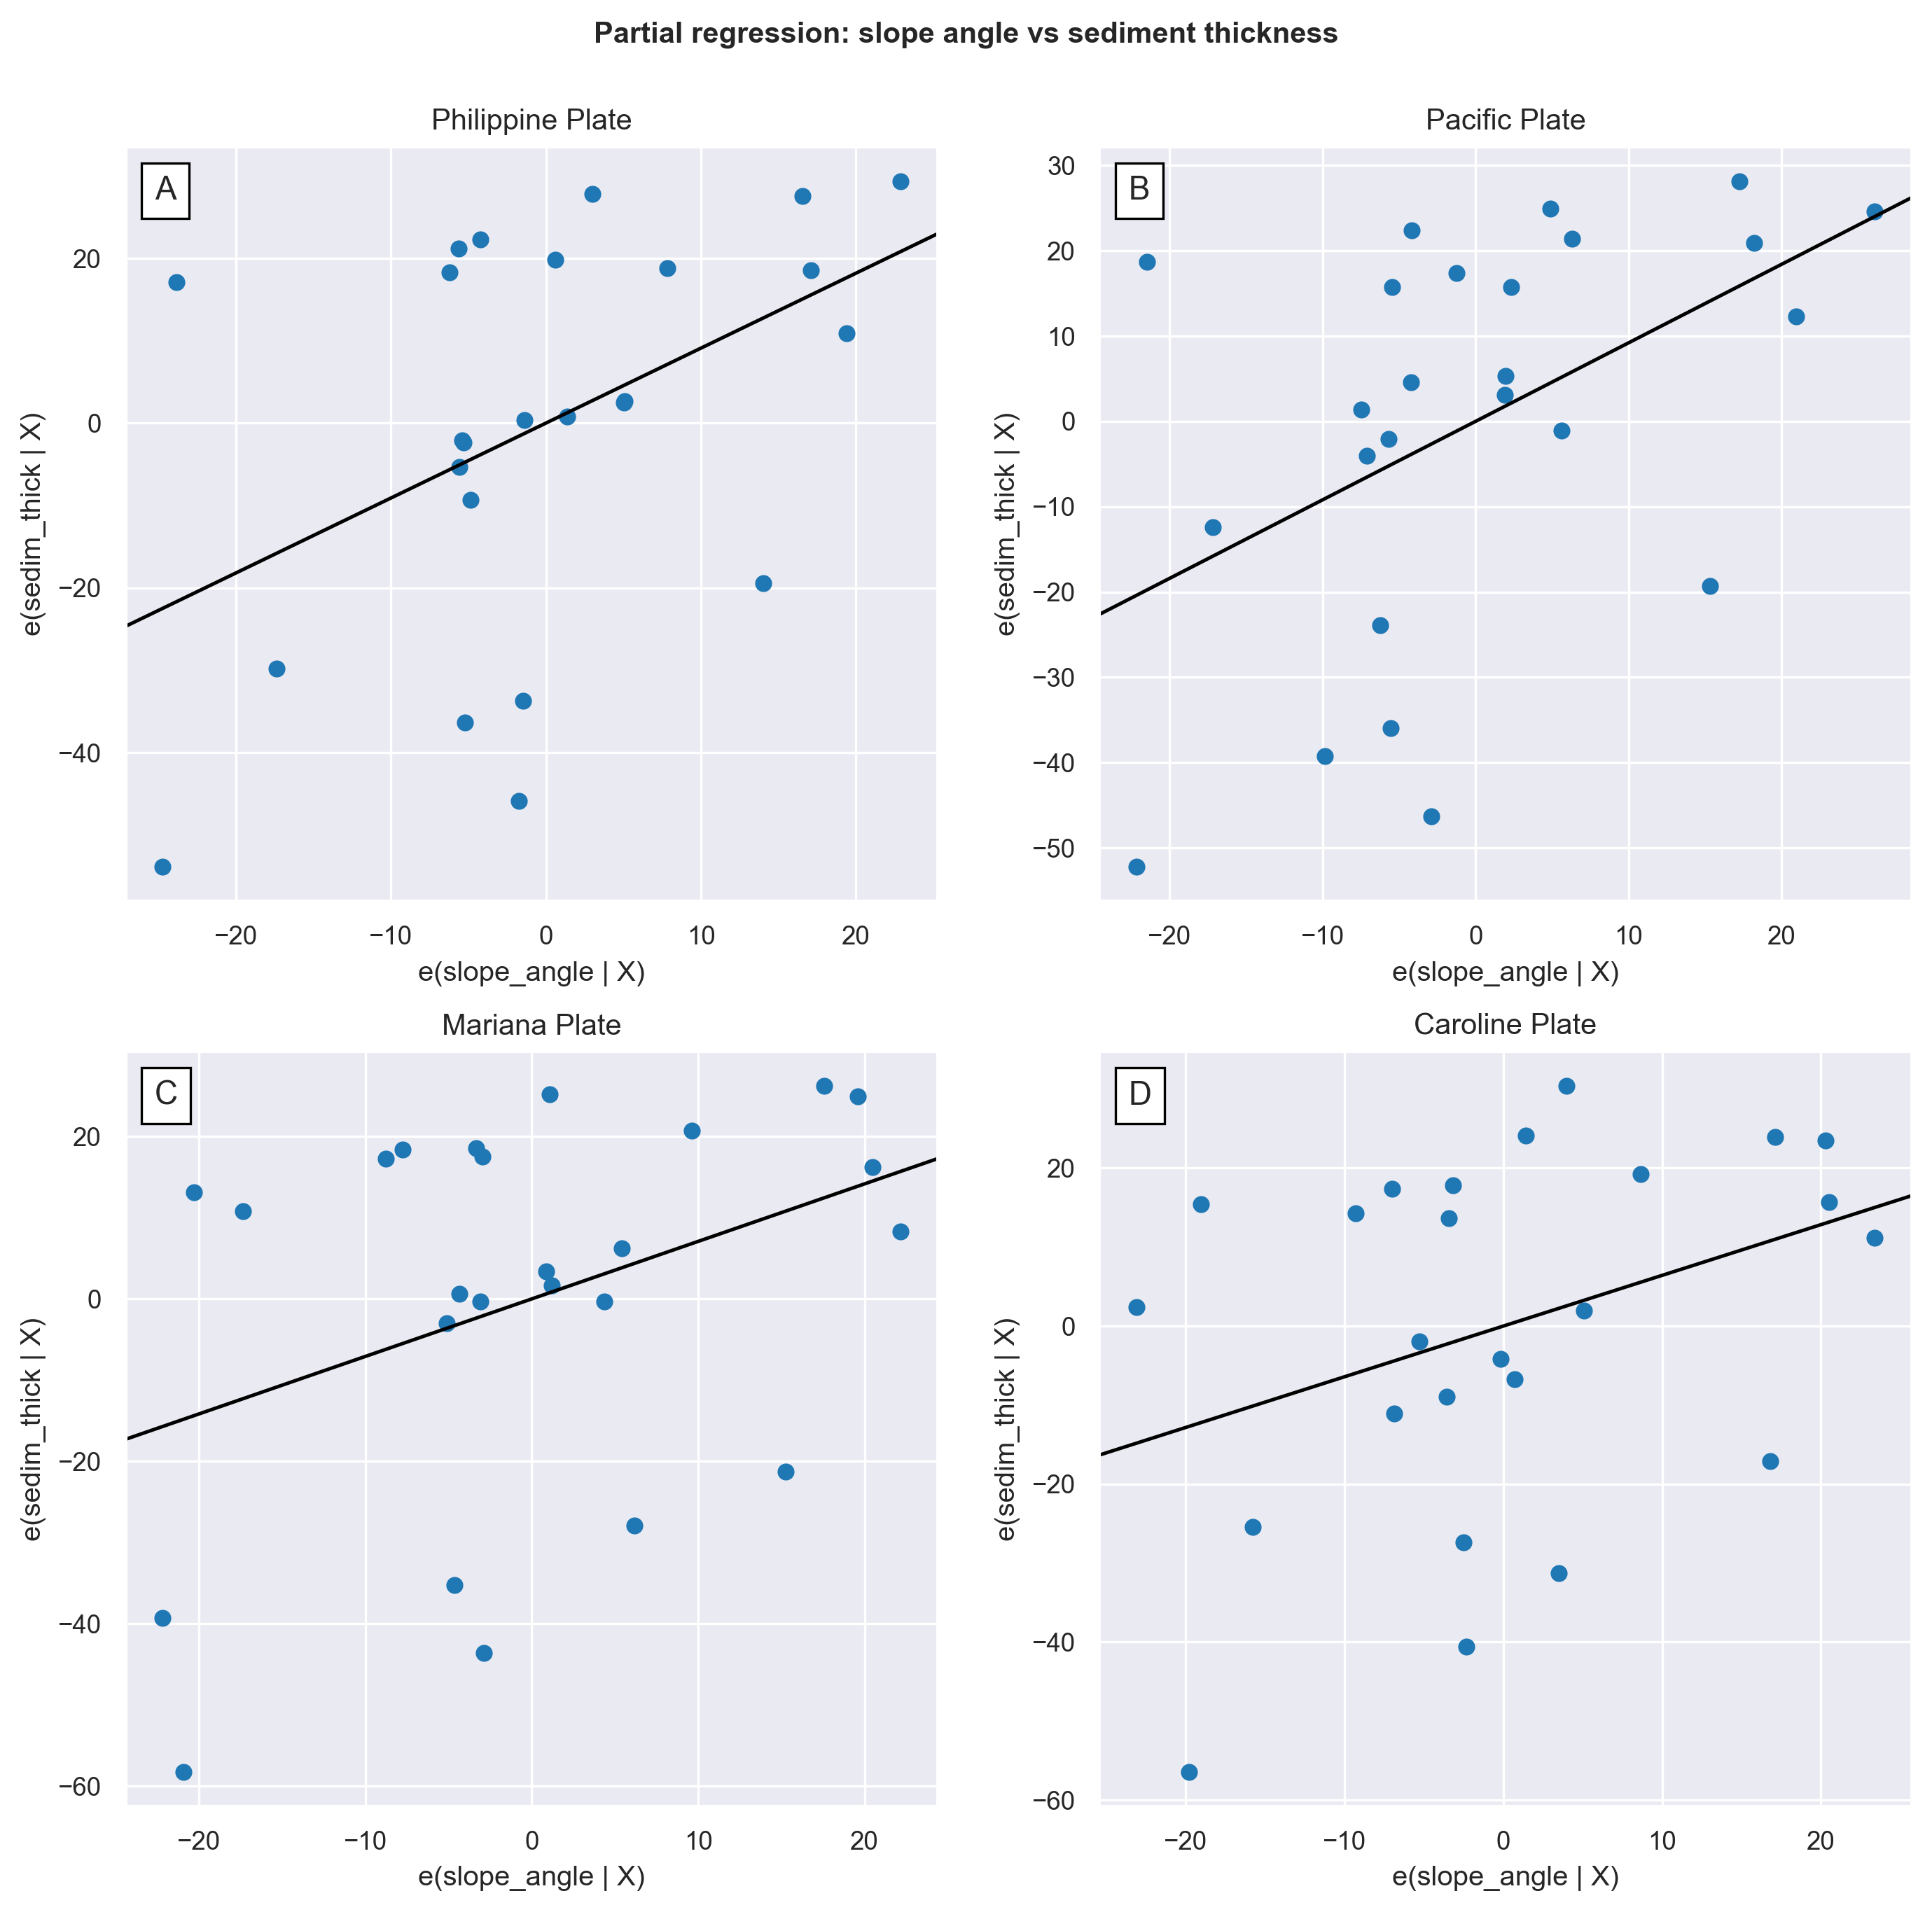

In [2]:
#!/usr/bin/env python
# coding: utf-8
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.artist as martist
from matplotlib.offsetbox import AnchoredText

os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")
df = df.dropna()
sns.set_style('darkgrid')
sns.set_context('paper')

def add_at(ax, t, loc=2):
    fp = dict(size=11)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(10,10), dpi=300)
# tuple for one row: fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4)
fig.suptitle('Partial regression: slope angle vs sediment thickness', 
             fontsize=10, fontweight='bold', x=0.5, y=0.93)

# subplot 1
ax1.plt = sm.graphics.plot_partregress('sedim_thick', 'slope_angle', 
                                       ['plate_phill', 'profile'], 
                                       data=df, obs_labels=False, ax=ax1)
ax1.set_title("Philippine Plate", fontsize=10)
add_at(ax1, "A")

# subplot 2
ax2.plt = sm.graphics.plot_partregress('sedim_thick', 'slope_angle', 
                                       ['plate_pacif', 'profile'], 
                                       data=df, obs_labels=False, ax=ax2)
ax2.set_title("Pacific Plate", fontsize=10)
add_at(ax2, "B")

# subplot 3
ax3.plt = sm.graphics.plot_partregress('sedim_thick', 'slope_angle', 
                                       ['plate_maria', 'profile'], 
                                       data=df, obs_labels=False, ax=ax3)
ax3.set_title("Mariana Plate", fontsize=10)
add_at(ax3, "C")

# subplot 4
ax4.plt = sm.graphics.plot_partregress('sedim_thick', 'slope_angle', 
                                       ['plate_carol', 'profile'], 
                                       data=df, obs_labels=False, ax=ax4)
ax4.set_title("Caroline Plate", fontsize=10)
add_at(ax4, "D")

# visualizing and saving
plt.tight_layout()
plt.subplots_adjust(top=0.87, bottom=0.08,
                    left=0.10, right=0.95,
                    hspace=0.2, wspace=0.2
                    )
plt.savefig('plot_PartReg.png', dpi=300)
plt.show()